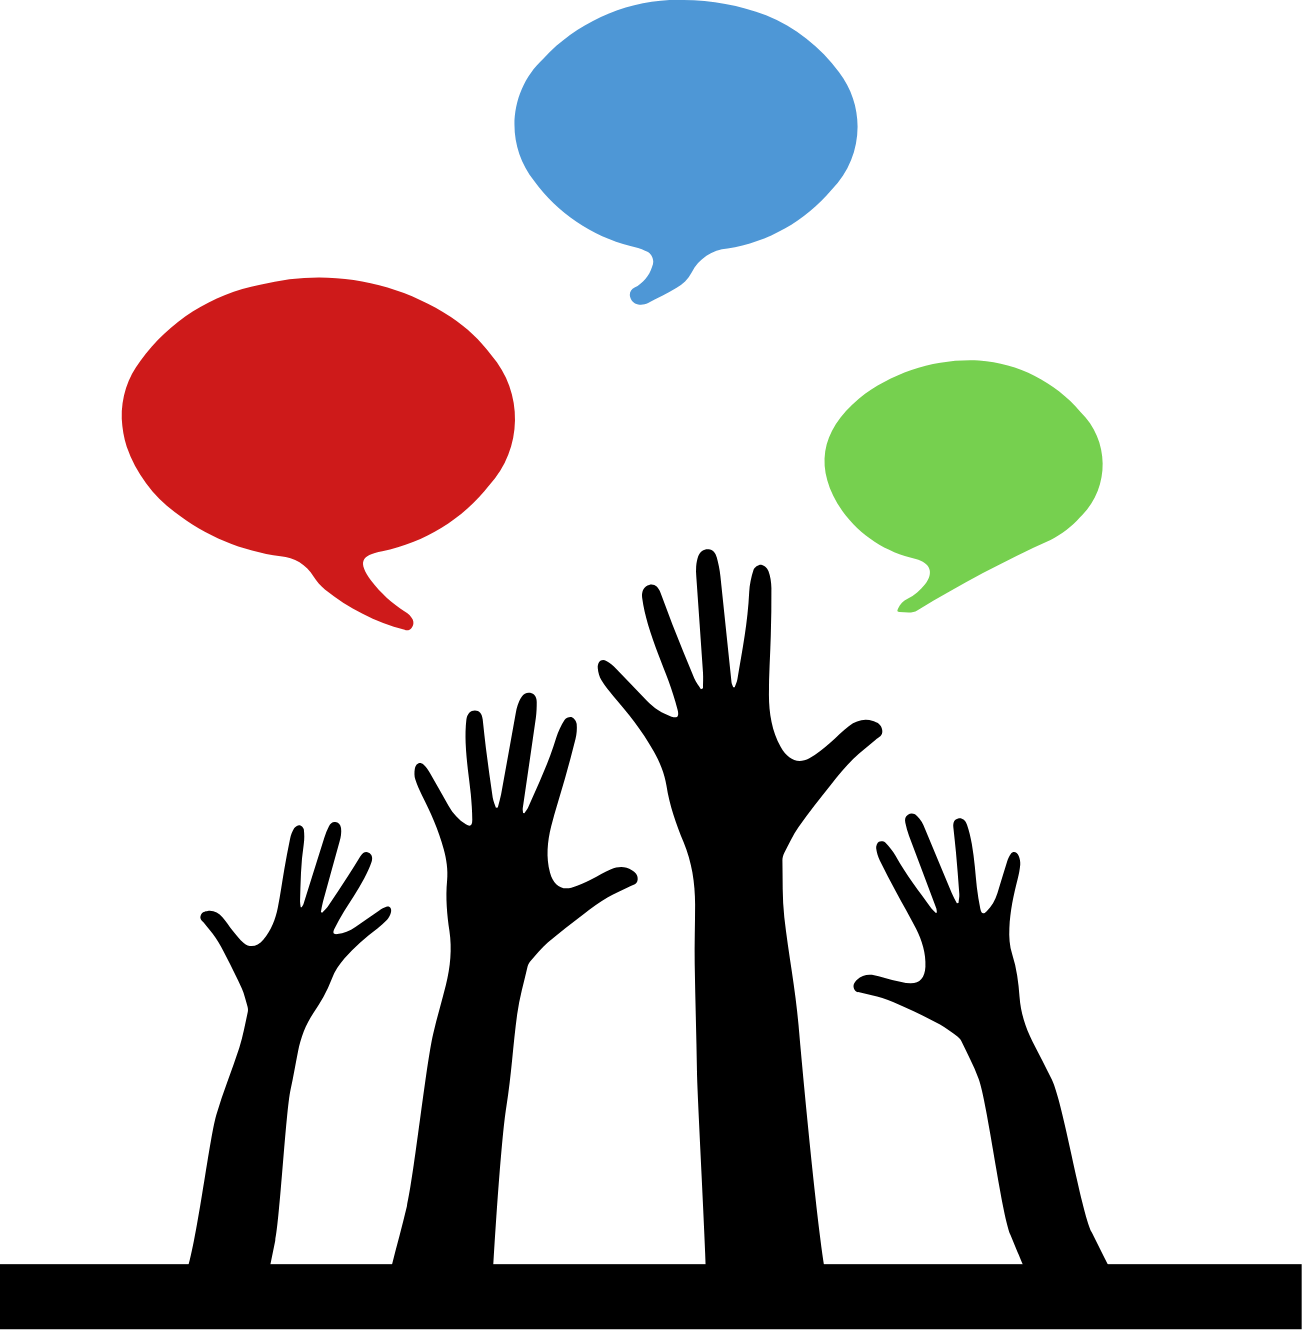

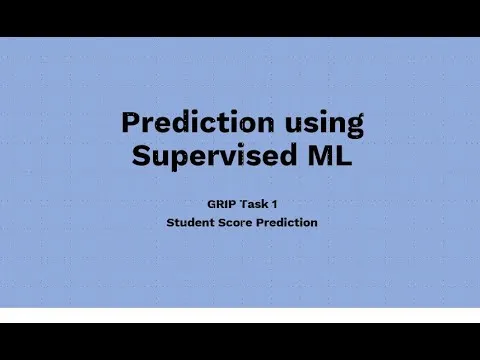


Name: Pankaj Sarkate

GitHub: https://github.com/pankajsrk/TSP-GRIP-Internship/blob/main/Sol1.LinearRegression.ipynb

LInkedIn: https://www.linkedin.com/in/pankaj-sarkate-433831255/

My Portfolio
The Sparks Foundation
GRIP: Data Science & Business Analytics Intern
Prediction using Supervised ML
Task 1
Simple Linear Regression

# We are going to solve this data set using following tools,
#programming language  -  Python and its libraries
#Machine learning   -     Scikit Learn 
#visualization tools -   matplotlib and seaborn
```
```


# PROBLEM STATEMENT

This is a simple linear regression task and the dataset has just two variables.


Goal : Predict the percentage of marks of a student who can score wihich is base on the number of studied hours he dedicates using Supervised Machine Learning 
i.e.
(LinearRegression model)


```

 



# importing libraries



In [1]:
# libraries for preprosessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# libraries for model building and evaluation.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# importing csv file

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
try: 
  student_df = pd.read_csv(url)
  print("data imported successfully")
except:
  print("data imported unsuccesfully")


data imported successfully


checking fews rows of the data 

In [4]:
student_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
student_df.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


# checking the data size, how many columns and rows are present in the given data

In [6]:
student_df.shape

(25, 2)

the given data shows that there are 25 rows and 2 columns present in the given data

# Rename the columns

In [7]:
data = {'Hours': "Studied_Hours", "Scores": "Percent_Scores"}
student_df.rename(columns = data, inplace=True)
student_df.head()

,Studied_Hours,Percent_Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30



Let us rename the column names as per the Python Naming Convention, for better readability and understanding.

# getting brief overview of the dataset - number of columns and rows (shape of dataset), 
# columns names and its dtype, how many non-null values it has and memory usage.

In [8]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Studied_Hours   25 non-null     float64
 1   Percent_Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes




## lets convert the columns into dtype float32, these can be in decimal. So the ML model may predict the data in decimal.


In [9]:


student_df['Studied_Hours'] = student_df['Studied_Hours'].astype('float32')
student_df['Percent_Scores'] = student_df['Percent_Scores'].astype('float32')



In [10]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Studied_Hours   25 non-null     float32
 1   Percent_Scores  25 non-null     float32
dtypes: float32(2)
memory usage: 328.0 bytes


# Checking the null values in percentage

In [11]:
student_df.isna().sum()/len(student_df)*100

Studied_Hours     0.0
Percent_Scores    0.0
dtype: float64

There is no null value present in the data set, it is a clean data

# Finding any duplicate data

In [12]:
print("TTotal number of duplicate values present in the data is :- ", student_df.duplicated().sum())

TTotal number of duplicate values present in the data is :-  0


Tere is no duplicate value found

# This data set is very small and there is no missing value is present and also columns are in numeric.

# Plotting for the relationship between columns

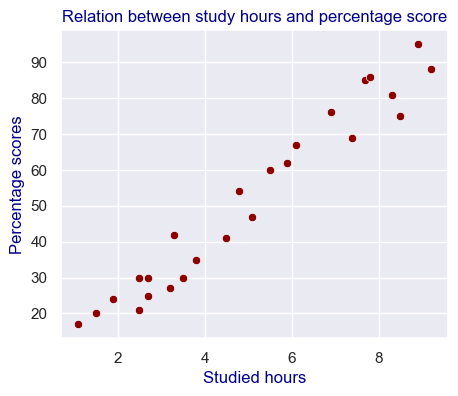

In [13]:
plt.figure(figsize=(5,4))
sns.set(style = 'darkgrid')
sns.scatterplot(x = 'Studied_Hours', y = 'Percent_Scores', data = student_df, color='darkred')
plt.title("Relation between study hours and percentage score", color='darkblue')
plt.xlabel("Studied hours", color='darkblue')
plt.ylabel("Percentage scores", color='darkblue')

plt.show()



This visualization shows that these columns has positive linear correlation between them.
Attributes are directly propertional with each other.  More the student studies in hours more the score he gets.


# Preparing the data for modeling and evaluation.

---



# initializing the X (independent variables / study_hours) 
# and y (dependent variable / percentage_scores)

In [14]:
X = student_df.drop('Percent_Scores', axis = 1)
y = student_df['Percent_Scores']

# splitting X and y into X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# finding the shape of X_train, X_test, y_train, y_test

In [16]:

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

**# creating object of our LinearRegression model and assigning to a variable model**

In [17]:
model = LinearRegression()

# training our LinearRegression model

In [18]:
try:
  model.fit(X_train, y_train)
  print("model has been trained successfully")

except:
  print("there is a problem with the model")

model has been trained successfully


# The regression line produced when the Linear Regression model got trained

In [19]:
# equation
# y = mx + c
# y = dependant variable
# m = slope
# x = independent variable
# c = line of intercept

line = model.coef_ * X_train + model.intercept_ 

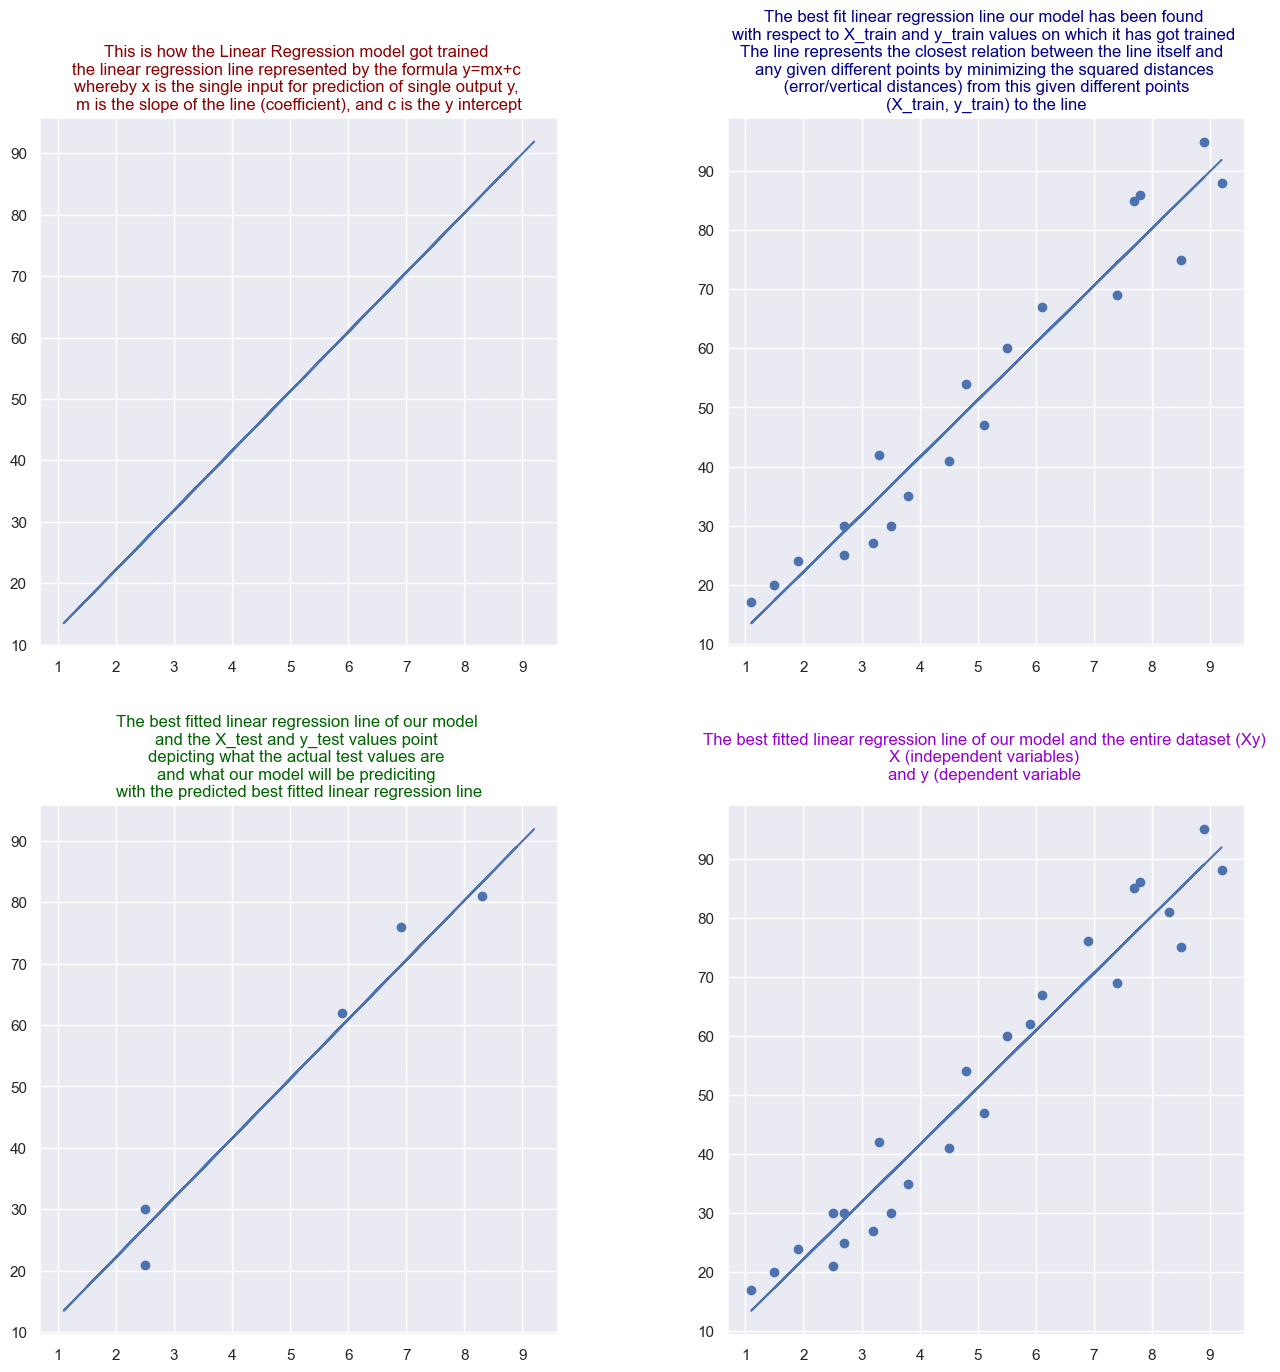

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,15)) # 2 rows and 2 columns subplots
fig.tight_layout(pad = 7.5) # padding between each subplots


ax[0, 0].set_title('This is how the Linear Regression model got trained \n' 
                   'the linear regression line represented by the formula y=mx+c \n'
                   'whereby x is the single input for prediction of single output y, \n' 
                   'm is the slope of the line (coefficient), and c is the y intercept', color='darkred')
ax[0, 0].plot(X_train, line)


ax[0, 1].set_title('The best fit linear regression line our model has been found \n' 
                   'with respect to X_train and y_train values on which it has got trained \n'
                   'The line represents the closest relation between the line itself and  \n'
                   'any given different points by minimizing the squared distances \n '
                   '(error/vertical distances) from this given different points \n'
                   '(X_train, y_train) to the line', color='darkblue')
ax[0, 1].scatter(X_train, y_train)            
ax[0, 1].plot(X_train, line)



ax[1, 0].set_title('The best fitted linear regression line of our model \n'
                   'and the X_test and y_test values point \n'
                   'depicting what the actual test values are \n'
                   'and what our model will be prediciting \n'
                   'with the predicted best fitted linear regression line', color='darkgreen')
ax[1, 0].scatter(X_test, y_test)            
ax[1, 0].plot(X_train, line)



ax[1, 1].set_title('The best fitted linear regression line of our model and the entire dataset (Xy) \n'
                   'X (independent variables) \n'
                   'and y (dependent variable \n', color='darkviolet')
ax[1, 1].scatter(X, y)            
ax[1, 1].plot(X_train, line)


plt.show()

# predicting the percentage_scores for X_test


In [21]:
pred = model.predict(X_test)

# comparing Actual vs Predicted


In [22]:
prediction_data = pd.DataFrame({'test_studyhours': X_test['Studied_Hours'], 'actual_percentscores': y_test, 'predicted_percentscores': pred})  
prediction_data

,test_studyhours,actual_percentscores,predicted_percentscores
8,8.3,81.0,83.188141
16,2.5,30.0,27.032085
0,2.5,21.0,27.032085
23,6.9,76.0,69.633224
11,5.9,62.0,59.951149


# r2_score (coefficient of determination) is a regression score function.
# It is the coefficient of how well the values fit compared to the original values.


In [23]:
r2_score(y_test, pred)

0.9678055220603294

# evaluating the performance of the model

In [24]:
# MAE
print('MAE:')
print(mean_absolute_error(y_test, pred))
print(" ")

#MSE
print('MSE:')
print(mean_squared_error(y_test, pred))
print(" ")

#RMSE
print('RMSE:')
print(np.sqrt(mean_squared_error(y_test, pred)))



MAE:
3.9207535
 
MSE:
18.943232
 
RMSE:
4.352382


# **What will be predicted score if a student studies for 9.25 hrs/ day?**

In [25]:
hours = pd.DataFrame({'Study_Hours': [9.25]})
predict_score = model.predict(hours)

print(f"No of Hours = {hours['Study_Hours'][0]}")
print(" ")
print(f"Predicted Score = {predict_score[0]}")


No of Hours = 9.25
 
Predicted Score = 92.38610887527466


In [26]:
# The First Task Has Been Completed